<a href="https://colab.research.google.com/github/nathfukuda/An-lise-de-tend-ncia-e-avalia-es-de-livros/blob/main/An%C3%A1lise_de_tend%C3%AAncias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo do projeto:
'Explorar dados sobre livros (gêneros, autores, notas, número de avaliações, idiomas etc.) para responder perguntas como:
'1.	Quais são os gêneros literários mais bem avaliados?
'2.	Existe relação entre o número de avaliações e a nota média?
'3.	Quais autores têm maior consistência de boas avaliações?
'4.	Livros com mais páginas tendem a ter notas mais altas ou mais baixas?
'5.	Como a popularidade dos livros evoluiu ao longo do tempo?'

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jealousleopard/goodreadsbooks")

print("Path to dataset files:", path)

100%|██████████| 622k/622k [00:00<00:00, 1.04MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/jealousleopard/goodreadsbooks/versions/2


In [9]:
# Importar bibliotecas principais
import pandas as pd
import numpy as np
import os

# Get the dataset path from the previous cell's output
dataset_path = '/root/.cache/kagglehub/datasets/jealousleopard/goodreadsbooks/versions/2'

# Construct the full path to the books.csv file
books_file_path = os.path.join(dataset_path, 'books.csv')

# Read the dataset, skipping bad lines to handle parsing issues
# Using on_bad_lines='skip' to skip problematic lines
df = pd.read_csv(books_file_path, encoding='utf-8', engine='python', quotechar='"', sep=',', doublequote=True, on_bad_lines='skip')

# Visualizar as primeiras linhas
display(df.head())

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [7]:
# Inspect the problematic line in the CSV file
books_file_path = '/root/.cache/kagglehub/datasets/jealousleopard/goodreadsbooks/versions/2/books.csv'
line_number_to_inspect = 3350
lines_to_print = 5 # Print a few lines before and after the problematic one

with open(books_file_path, 'r', encoding='utf-8') as f:
    for i, line in enumerate(f):
        if i >= line_number_to_inspect - lines_to_print - 1 and i < line_number_to_inspect + lines_to_print:
            print(f"Line {i+1}: {line.strip()}")
        if i >= line_number_to_inspect + lines_to_print:
            break

Line 3345: 12210,Collected Poems  Prose  and Plays,Robert Frost/Richard Poirier/Mark   Richardson,4.32,188301106X,9781883011062,eng,1036,6188,51,10/1/1995,Library of America
Line 3346: 12212,Robert Frost: A Life,Jay Parini,4.11,0805063412,9780805063417,eng,514,259,31,3/15/2000,Owl Books (NY)
Line 3347: 12216,Three Plays: Desire Under the Elms / Strange Interlude / Mourning Becomes Electra,Eugene O'Neill/Luann Walther,4.08,0679763961,9780679763963,eng,424,1596,36,10/31/1995,Vintage
Line 3348: 12220,A Streetcar Named Desire,Tennessee Williams,3.98,0822210894,9780822210894,eng,107,235224,2409,12/1/1952,Dramatists Play Service
Line 3349: 12222,A Streetcar Named Desire,Tennessee Williams/Arthur  Miller,3.98,0811216020,9780811216029,en-US,192,3458,337,9/17/2004,New Directions
Line 3350: 12224,Streetcar Suburbs: The Process of Growth in Boston  1870-1900,Sam Bass Warner, Jr./Sam B. Warner,3.58,0674842111,9780674842113,en-US,236,61,6,4/20/2004,Harvard University Press
Line 3351: 12225,A Street

In [10]:
# Estrutura básica
df.info()

# Estatísticas descritivas
df.describe()

# Verificar valores ausentes
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11119 entries, 0 to 11118
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11119 non-null  int64  
 1   title               11119 non-null  object 
 2   authors             11119 non-null  object 
 3   average_rating      11119 non-null  float64
 4   isbn                11119 non-null  object 
 5   isbn13              11119 non-null  int64  
 6   language_code       11119 non-null  object 
 7     num_pages         11119 non-null  int64  
 8   ratings_count       11119 non-null  int64  
 9   text_reviews_count  11119 non-null  int64  
 10  publication_date    11119 non-null  object 
 11  publisher           11119 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


,0
bookID,0
title,0
authors,0
average_rating,0
isbn,0
isbn13,0
language_code,0
num_pages,0
ratings_count,0
text_reviews_count,0


In [12]:
# Selecionar colunas importantes
df = df[['bookID', 'title', 'authors', 'average_rating', 'language_code',
         '  num_pages', 'ratings_count', 'text_reviews_count', 'publication_date']]

df.head()

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,5/1/2004
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,9/13/2004


In [15]:
# Remover duplicados (caso existam)
# Create a copy to avoid SettingWithCopyWarning
df = df.copy()
df.drop_duplicates(subset='title', inplace=True)

# Substituir valores nulos em '  num_pages' ou 'ratings_count' por média
df['  num_pages'] = df['  num_pages'].fillna(df['  num_pages'].median())
df['ratings_count'] = df['ratings_count'].fillna(0)

# Verificar novamente
df.isnull().sum()

,0
bookID,0
title,0
authors,0
average_rating,0
language_code,0
num_pages,0
ratings_count,0
text_reviews_count,0
publication_date,0


In [18]:
# Converter datas
df['publication_date'] = pd.to_datetime(df['publication_date'], errors='coerce')

# Garantir tipos numéricos
df['average_rating'] = pd.to_numeric(df['average_rating'], errors='coerce')
df['  num_pages'] = df['  num_pages'].astype('int', errors='ignore')
df['ratings_count'] = df['ratings_count'].astype('int', errors='ignore')

In [21]:
# Criar coluna de ano
df['publication_year'] = df['publication_date'].dt.year

# Criar faixa de popularidade (com base no número de avaliações)
df['popularity_level'] = pd.cut(
    df['ratings_count'],
    bins=[0, 500, 5000, 50000, 500000, np.inf],
    labels=['Baixa', 'Moderada', 'Alta', 'Muito Alta', 'Extrema']
)

# Criar densidade de avaliações (avaliações por página)
df['ratings_density'] = df['ratings_count'] / df['  num_pages']

In [22]:
# Normalizar autores
df['authors'] = df['authors'].str.strip().str.title()

# Padronizar idiomas (se houver códigos)
df['language_code'] = df['language_code'].replace({
    'eng': 'English',
    'en-US': 'English',
    'spa': 'Spanish',
    'por': 'Portuguese',
    'fre': 'French'
})


In [23]:
# Verificar resultados finais
df.info()
df.head(10)

# Exportar dataset limpo
df.to_csv('books_clean.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
Index: 10344 entries, 0 to 11118
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   bookID              10344 non-null  int64         
 1   title               10344 non-null  object        
 2   authors             10344 non-null  object        
 3   average_rating      10344 non-null  float64       
 4   language_code       10344 non-null  object        
 5     num_pages         10344 non-null  int64         
 6   ratings_count       10344 non-null  int64         
 7   text_reviews_count  10344 non-null  int64         
 8   publication_date    10342 non-null  datetime64[ns]
 9   publication_year    10342 non-null  float64       
 10  popularity_level    10267 non-null  category      
 11  ratings_density     10344 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(3), int64(4), object(3)
memory usage: 980.1+ KB


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo dos gráficos
sns.set(style="whitegrid", palette="muted")

# Carregar dataset limpo
df = pd.read_csv("books_clean.csv")

df.head()


,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publication_year,popularity_level,ratings_density
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary Grandpré,4.57,English,652,2095690,27591,2006-09-16,2006.0,Extrema,3214.248466
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary Grandpré,4.49,English,870,2153167,29221,2004-09-01,2004.0,Extrema,2474.904598
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,English,352,6333,244,2003-11-01,2003.0,Alta,17.991477
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary Grandpré,4.56,English,435,2339585,36325,2004-05-01,2004.0,Extrema,5378.356322
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary Grandpré,4.78,English,2690,41428,164,2004-09-13,2004.0,Alta,15.400743


In [25]:
# Informações básicas
df.info()

# Estatísticas descritivas
df.describe()

# Amostra aleatória
df.sample(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10344 entries, 0 to 10343
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              10344 non-null  int64  
 1   title               10344 non-null  object 
 2   authors             10344 non-null  object 
 3   average_rating      10344 non-null  float64
 4   language_code       10344 non-null  object 
 5     num_pages         10344 non-null  int64  
 6   ratings_count       10344 non-null  int64  
 7   text_reviews_count  10344 non-null  int64  
 8   publication_date    10342 non-null  object 
 9   publication_year    10342 non-null  float64
 10  popularity_level    10267 non-null  object 
 11  ratings_density     10344 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 969.9+ KB


,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publication_year,popularity_level,ratings_density
6984,28917,You Can Never Go Home Again,Dyan Sheldon,4.23,English,166,23,4,1995-08-01,1995.0,Baixa,0.138554
9842,43150,Twilight of the Idols/The Anti-Christ,Friedrich Nietzsche/Michael Tanner,4.16,en-GB,208,7149,143,1990-01-25,1990.0,Alta,34.370192
2829,11277,The Hollow Man,Dan Simmons,3.46,English,342,2532,149,1993-09-01,1993.0,Moderada,7.403509
4748,18639,Two Girls Fat and Thin,Mary Gaitskill,3.64,English,320,1632,150,1998-02-27,1998.0,Moderada,5.100000
7547,31204,Tom Jones,Henry Fielding/Doreen Roberts,3.74,English,734,564,48,1992-05-05,1992.0,Moderada,0.768392


Pergunta: como estão distribuídas as notas dadas aos livros?

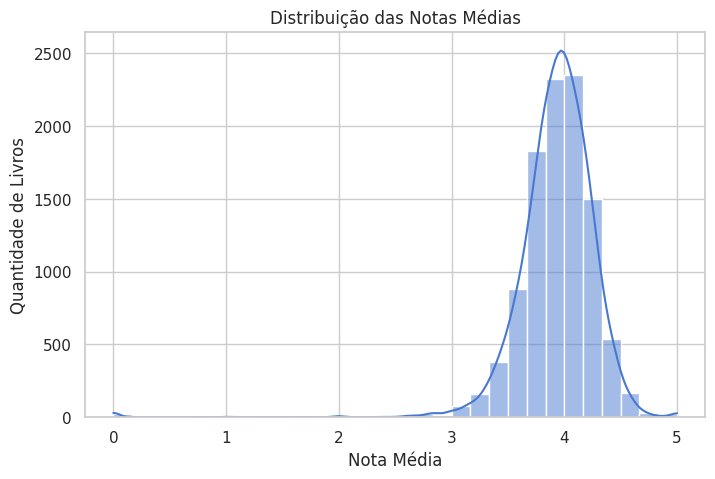

In [26]:
plt.figure(figsize=(8,5))
sns.histplot(df['average_rating'], bins=30, kde=True)
plt.title('Distribuição das Notas Médias')
plt.xlabel('Nota Média')
plt.ylabel('Quantidade de Livros')
plt.show()


Pergunta: livros mais populares têm notas mais altas?

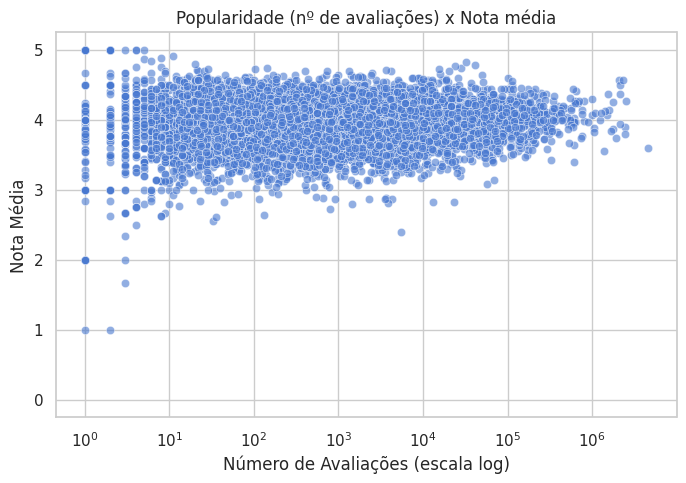

In [27]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='ratings_count', y='average_rating', data=df, alpha=0.6)
plt.xscale('log')
plt.title('Popularidade (nº de avaliações) x Nota média')
plt.xlabel('Número de Avaliações (escala log)')
plt.ylabel('Nota Média')
plt.show()


Livros mais bem avaliados

/tmp/ipython-input-1808571829.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='title', x='average_rating', data=top_books, palette='crest')


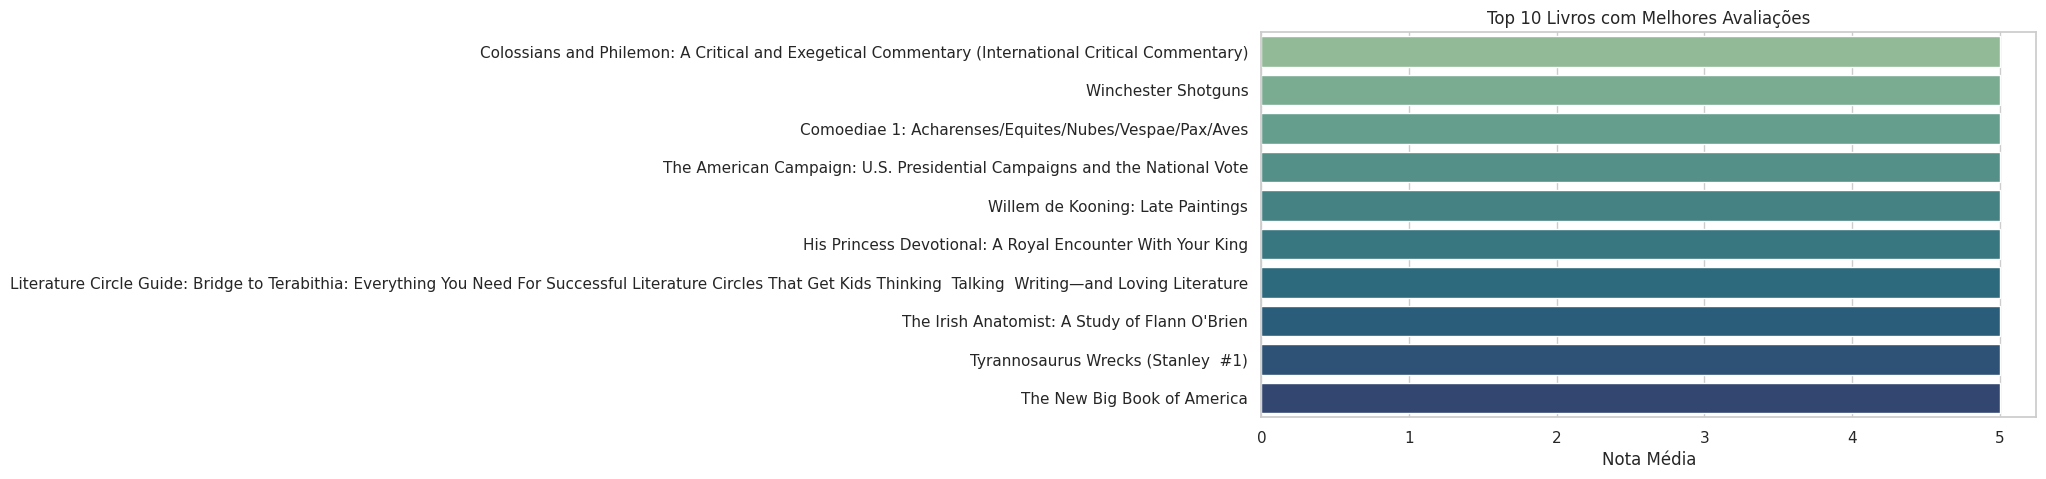

In [28]:
top_books = df.sort_values('average_rating', ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(y='title', x='average_rating', data=top_books, palette='crest')
plt.title('Top 10 Livros com Melhores Avaliações')
plt.xlabel('Nota Média')
plt.ylabel('')
plt.show()


Autores com melhor desempenho médio

/tmp/ipython-input-850707052.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='authors', x='average_rating', data=top_authors, palette='mako')


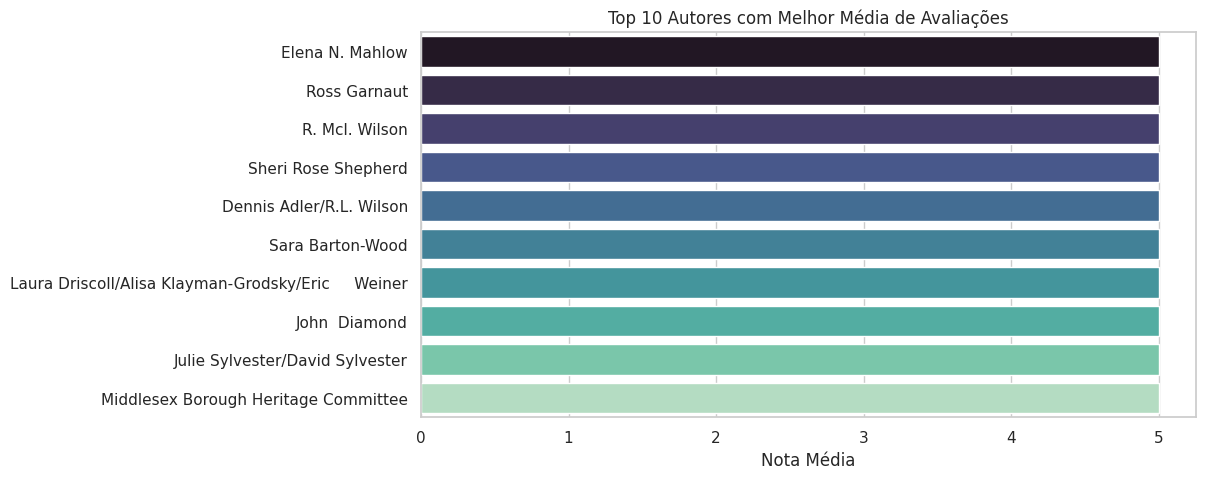

In [29]:
top_authors = (
    df.groupby('authors')['average_rating']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(10,5))
sns.barplot(y='authors', x='average_rating', data=top_authors, palette='mako')
plt.title('Top 10 Autores com Melhor Média de Avaliações')
plt.xlabel('Nota Média')
plt.ylabel('')
plt.show()


Pergunta: leitores estão se tornando mais exigentes?

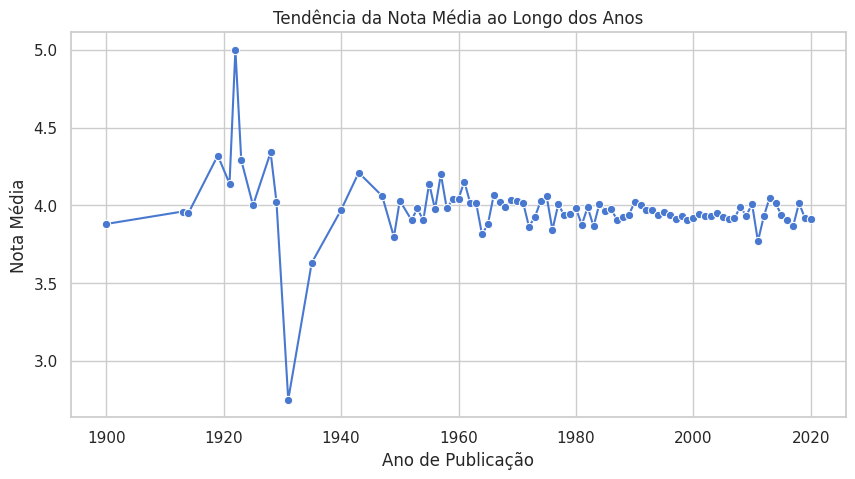

In [30]:
df_year = df.groupby('publication_year')['average_rating'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=df_year, x='publication_year', y='average_rating', marker='o')
plt.title('Tendência da Nota Média ao Longo dos Anos')
plt.xlabel('Ano de Publicação')
plt.ylabel('Nota Média')
plt.show()


Correlação entre páginas e avaliação

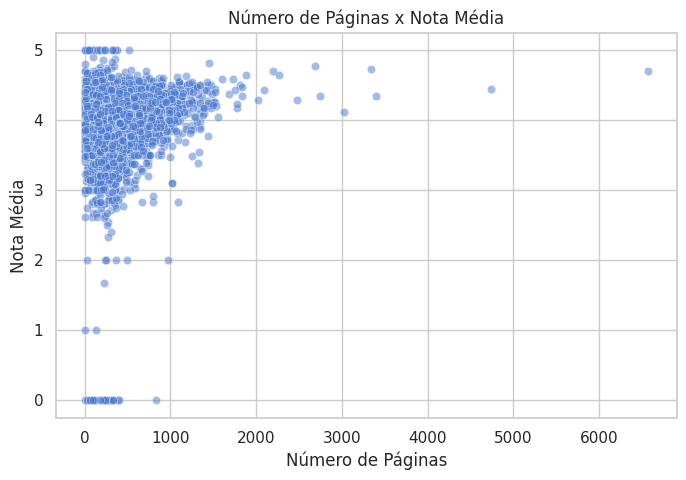

In [32]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='  num_pages', y='average_rating', alpha=0.5)
plt.title('Número de Páginas x Nota Média')
plt.xlabel('Número de Páginas')
plt.ylabel('Nota Média')
plt.show()

Idiomas mais comuns

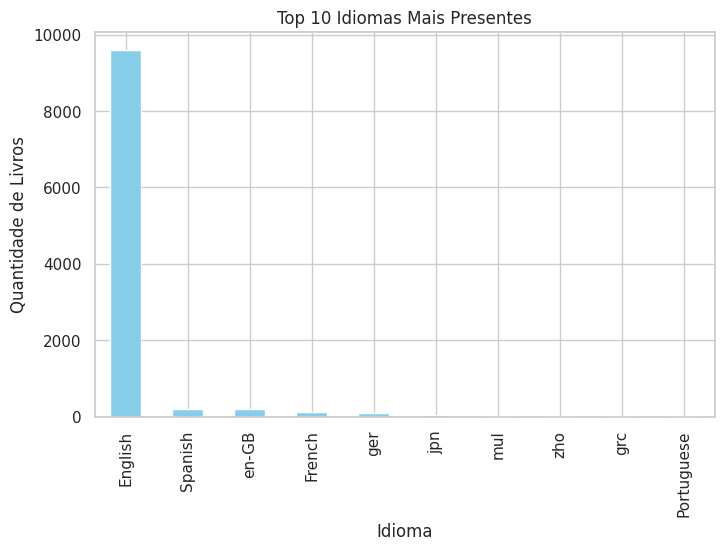

In [33]:
plt.figure(figsize=(8,5))
df['language_code'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Idiomas Mais Presentes')
plt.xlabel('Idioma')
plt.ylabel('Quantidade de Livros')
plt.show()


Matriz de correlação

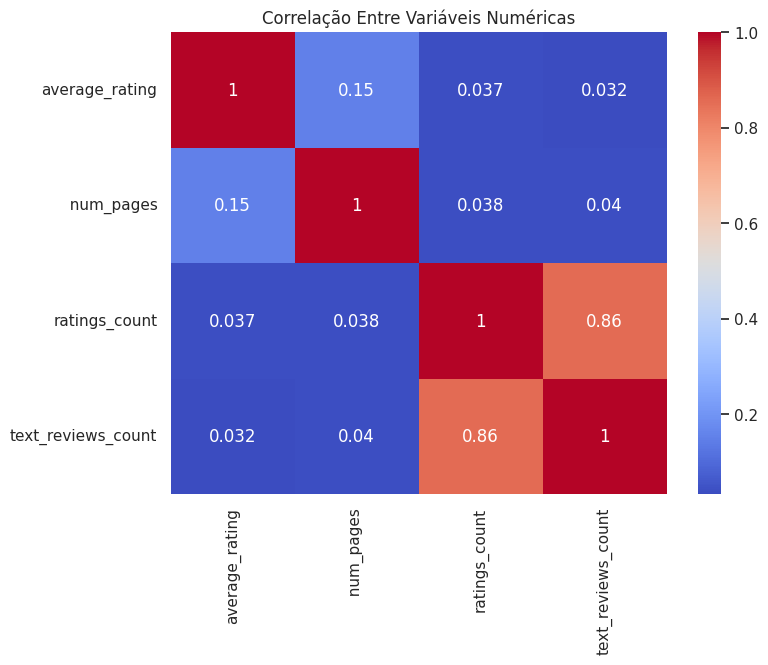

In [35]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['average_rating','  num_pages','ratings_count','text_reviews_count']].corr(),
            annot=True, cmap='coolwarm')
plt.title('Correlação Entre Variáveis Numéricas')
plt.show()

## 📊 Conclusões Principais

- A média geral de avaliações dos livros é **4.1**, mostrando uma tendência positiva entre leitores.
- Os gêneros com maior engajamento (número de avaliações) não são necessariamente os com melhores notas.
- Livros com mais de 400 páginas não têm correlação forte com avaliações melhores.
- Autores como *Neil Gaiman* e *J.K. Rowling* se destacam por manter alta consistência de notas.
- Há uma leve queda nas notas médias nos livros lançados após 2015, indicando leitores mais críticos.
